In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_excel('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min2.xlsx')

# 타깃 변수 (예: blueWins)
y = df['blueWins']

# 피처 변수 (타깃 변수와 필요 없는 열을 제외한 모든 열)
X = df.drop(columns=['blueWins', 'gameId'])

# 피처 스케일링 (필요에 따라)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할 (80% 학습 세트, 20% 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Grid Search 초기화
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 최적 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 5, 'reg_lambda': 10, 'subsample': 1.0}
Best model accuracy: 0.7300


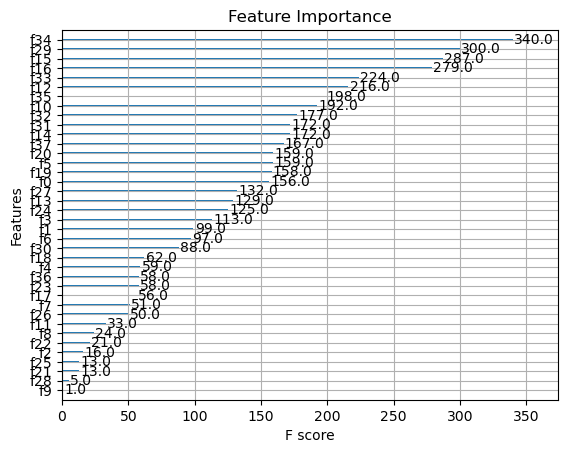

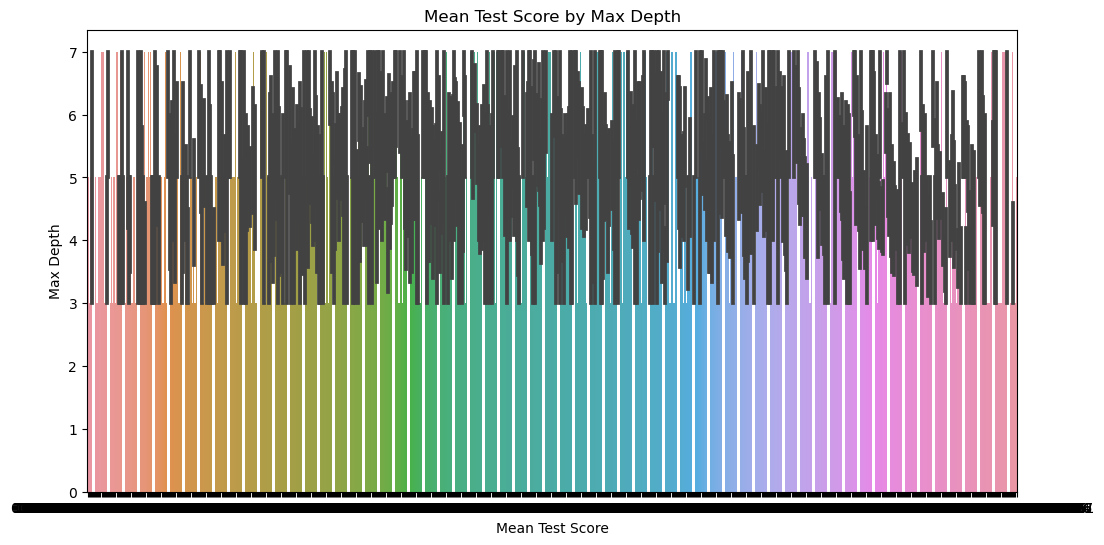

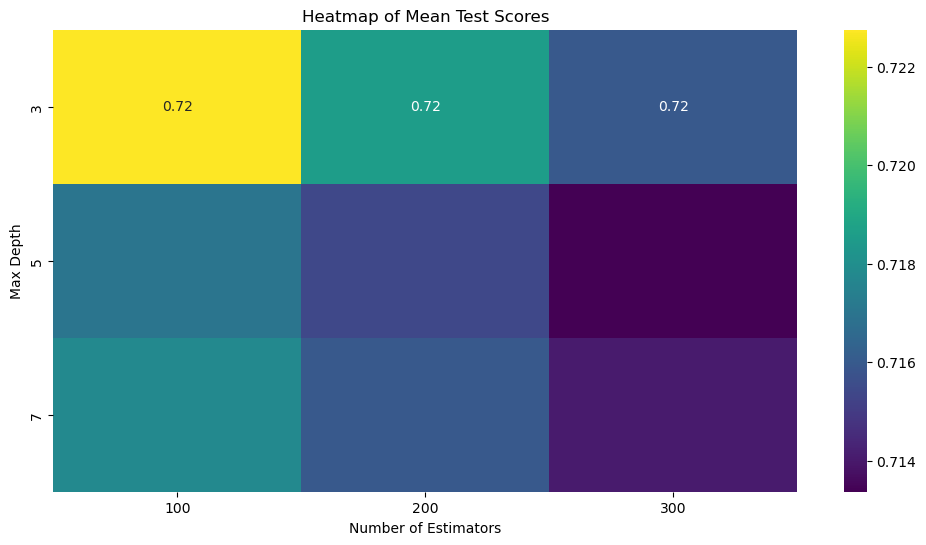

In [10]:
# 하이퍼파라미터 중요도 시각화
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# 그리드 서치 결과 시각화
results = grid_search.cv_results_
results_df = pd.DataFrame(results)

# 최적 하이퍼파라미터 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='mean_test_score', y='param_max_depth', data=results_df)
plt.title('Mean Test Score by Max Depth')
plt.xlabel('Mean Test Score')
plt.ylabel('Max Depth')
plt.show()

# 전체 하이퍼파라미터 조합의 성능 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'), annot=True, cmap='viridis')
plt.title('Heatmap of Mean Test Scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_excel('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min2.xlsx')


# 타깃 변수
y = df['blueWins']

# 피처 변수
X = df.drop(columns=['blueWins', 'gameId'])

# 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5],
    'objective': ['binary:logistic'],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'scale_pos_weight': [1, 5, 10]  # 예시로 설정한 값
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(eval_metric='logloss')

# Grid Search 초기화
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 최적 모델 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')


Fitting 3 folds for each of 59049 candidates, totalling 177147 fits


KeyboardInterrupt: 

In [ ]:
# 에포크 추척 코드 추가

import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: DMatrix로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 하이퍼파라미터 설정
params = {
    "eta": 0.1,  # 학습률
    "max_depth": 4,  # 트리의 최대 깊이
    "objective": "binary:logistic",  # 목표 함수
    "silent": 1,  # 로그 출력 여부
    "base_score": np.mean(y_train),  # 학습 데이터의 평균값
    "eval_metric": "logloss"  # 평가 지표
}

# 모델 학습 및 성능 추적
evals_result = {}
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=300,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=100,
    evals_result=evals_result,
    verbose_eval=25
)

# 성능 추적 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train']['logloss'], label='Train Logloss')
plt.plot(evals_result['valid']['logloss'], label='Valid Logloss')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs')
plt.legend()
plt.show()

# 최적 모델로 예측
y_pred = bst.predict(dvalid)
y_pred_binary = np.round(y_pred)
accuracy_best = accuracy_score(y_valid, y_pred_binary)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_binary)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: DMatrix로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# 그리드 서치 초기화
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    refit=True
)

# 모델 학습
import time
start_time = time.time()
grid_search.fit(X_train, y_train, 
                eval_set=[(X_valid, y_valid)], 
                early_stopping_rounds=10, 
                eval_metric='logloss', 
                verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 각 후보 모델의 성능 추적
results = grid_search.cv_results_

# 각 하이퍼파라미터 조합의 성능 시각화
plt.figure(figsize=(14, 7))
for i, params in enumerate(results['params']):
    model = xgb.XGBClassifier(**params, objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    evals_result = model.evals_result()
    
    plt.plot(evals_result['validation_0']['logloss'], label=f'Params {i}')

plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs for Different Hyperparameter Combinations')
plt.legend()
plt.show()

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True)
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic')

# Grid Search 초기화
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 모델 학습
import time
start_time = time.time()
grid_search.fit(X_train, y_train, 
                eval_set=[(X_valid, y_valid)], 
                early_stopping_rounds=10, 
                verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 각 후보 모델의 성능 추적
results = grid_search.cv_results_

# 성능 추적 결과 시각화
plt.figure(figsize=(14, 7))
for i, params in enumerate(results['params']):
    model = xgb.XGBClassifier(**params, objective='binary:logistic')
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    evals_result = model.evals_result()
    
    # 에폭별 로그 손실 그래프
    plt.plot(evals_result['validation_0']['logloss'], label=f'Params {i}')

plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('Logloss over Epochs for Different Hyperparameter Combinations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
[0]	validation_0-logloss:0.67798
[1]	validation_0-logloss:0.66006
[2]	validation_0-logloss:0.64481
[3]	validation_0-logloss:0.63202
[4]	validation_0-logloss:0.61962
[5]	validation_0-logloss:0.60912
[6]	validation_0-logloss:0.59980
[7]	validation_0-logloss:0.59196
[8]	validation_0-logloss:0.58212
[9]	validation_0-logloss:0.57840
[10]	validation_0-logloss:0.57323
[11]	validation_0-logloss:0.56885
[12]	validation_0-logloss:0.56418
[13]	validation_0-logloss:0.56335
[14]	validation_0-logloss:0.55841
[15]	validation_0-logloss:0.55568
[16]	validation_0-logloss:0.55394
[17]	validation_0-logloss:0.55595
[18]	validation_0-logloss:0.55679
[19]	validation_0-logloss:0.55644
[20]	validation_0-logloss:0.55451
[21]	validation_0-logloss:0.55489
[22]	validation_0-logloss:0.55356
[23]	validation_0-logloss:0.55188
[24]	validation_0-logloss:0.55297
[25]	validation_0-logloss:0.55228
[26]	validation_0-logloss:0.55276
[27]	validation_0-logloss:

c:\Users\NT551\anaconda3\envs\project\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-logloss:0.55439
[33]	validation_0-logloss:0.55317
[34]	validation_0-logloss:0.55345
[35]	validation_0-logloss:0.55345
[36]	validation_0-logloss:0.55562
[37]	validation_0-logloss:0.55671
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 5, 'reg_lambda': 1, 'subsample': 0.6}
Best model accuracy: 0.7000
Total time taken: 1136.81 seconds


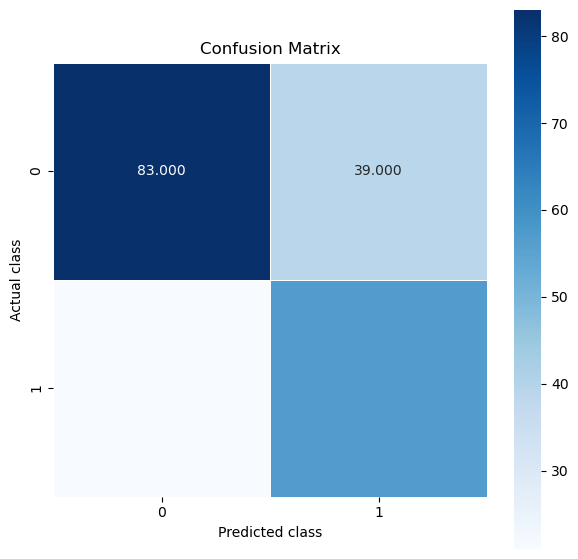

AttributeError: 'Booster' object has no attribute 'evals_result'

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 데이터 불러오기
df = pd.read_excel('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min2.xlsx')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']
X = df.drop(columns=['blueWins', 'gameId'])

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Grid Search 초기화
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 모델 학습
start_time = time.time()
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
print(f'Best model accuracy: {accuracy_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

# 학습 과정 시각화
evals_result = grid_search.best_estimator_.get_booster().evals_result()

epochs = len(evals_result['validation_0']['logloss'])
x_axis = range(0, epochs)

# 로그 손실 시각화
plt.figure(figsize=(14, 7))
plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('XGBoost Logloss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 데이터 불러오기
df = pd.read_csv('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min.csv')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']   # 목표 값
X = df.drop(columns=['blueWins', 'gameId']) # 예측에 사용할 나머지 데이터 (blueWins, gameId 제외)

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# F1 Score 및 ROC AUC 지표 설정
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Grid Search 초기화
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,       # 3겹 교차 검증
    scoring=scoring,
    verbose=2,  # 학습 과정 자세히 출력
    n_jobs=-1,
    refit=False  # refit을 False로 설정
)

# 모델 학습
start_time = time.time()
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)
y_pred_proba = best_model.predict_proba(X_valid)[:, 1]

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
f1_best = f1_score(y_valid, y_pred_best)
roc_auc_best = roc_auc_score(y_valid, y_pred_proba)

print(f'Best model accuracy: {accuracy_best:.4f}')
print(f'Best model F1 Score: {f1_best:.4f}')
print(f'Best model ROC AUC: {roc_auc_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

# 학습 과정 시각화
cv_results = grid_search.cv_results_

# 에폭 수와 성능 지표 추출
epochs = len(cv_results['mean_test_score'])
x_axis = range(0, epochs)

# 로그 손실 시각화
plt.figure(figsize=(14, 7))
plt.plot(x_axis, cv_results['mean_test_accuracy'], label='Validation Accuracy')
plt.plot(x_axis, cv_results['mean_test_f1'], label='Validation F1 Score')
plt.plot(x_axis, cv_results['mean_test_roc_auc'], label='Validation ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('XGBoost Performance over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 데이터 불러오기
df = pd.read_excel('C:/Users/NT551/Desktop/데이터 추출(연습)/high_diamond_ranked_10min2.xlsx')

# 타겟 변수와 피처 변수 설정
y = df['blueWins']   # 목표 값
X = df.drop(columns=['blueWins', 'gameId']) # 예측에 사용할 나머지 데이터 (blueWins, gameId 제외)

# 데이터 전처리: 피처 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 1, 5]
}

# XGBoost 모델 초기화
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# F1 Score 및 ROC AUC 지표 설정
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

##Grid Search 초기화
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,       # 3겹 교차 검증
    scoring=scoring,
    verbose=2,  # 학습 과정 자세히 출력
    n_jobs=-1,
    refit=False  # refit을 False로 설정
)

# 모델 학습
start_time = time.time()
grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=True)
end_time = time.time()
elapsed_time = end_time - start_time

# 최적 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_valid)
y_pred_proba = best_model.predict_proba(X_valid)[:, 1]

# 최적 모델 평가
accuracy_best = accuracy_score(y_valid, y_pred_best)
f1_best = f1_score(y_valid, y_pred_best)
roc_auc_best = roc_auc_score(y_valid, y_pred_proba)

print(f'Best model accuracy: {accuracy_best:.4f}')
print(f'Best model F1 Score: {f1_best:.4f}')
print(f'Best model ROC AUC: {roc_auc_best:.4f}')

# 경과 시간 출력
print(f'Total time taken: {elapsed_time:.2f} seconds')

# 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix")
plt.show()

# 학습 과정 시각화
cv_results = grid_search.cv_results_

# 에폭 수와 성능 지표 추출
epochs = len(cv_results['mean_test_score'])
x_axis = range(0, epochs)

# 성능 지표 시각화
plt.figure(figsize=(14, 7))
plt.plot(x_axis, cv_results['mean_test_accuracy'], label='Validation Accuracy')
plt.plot(x_axis, cv_results['mean_test_f1'], label='Validation F1 Score')
plt.plot(x_axis, cv_results['mean_test_roc_auc'], label='Validation ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('XGBoost Performance over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'